<a href="https://colab.research.google.com/github/FrancescoRito/Dashboard_F1/blob/main/Logistic_regression_model_Salifort_Motors_project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


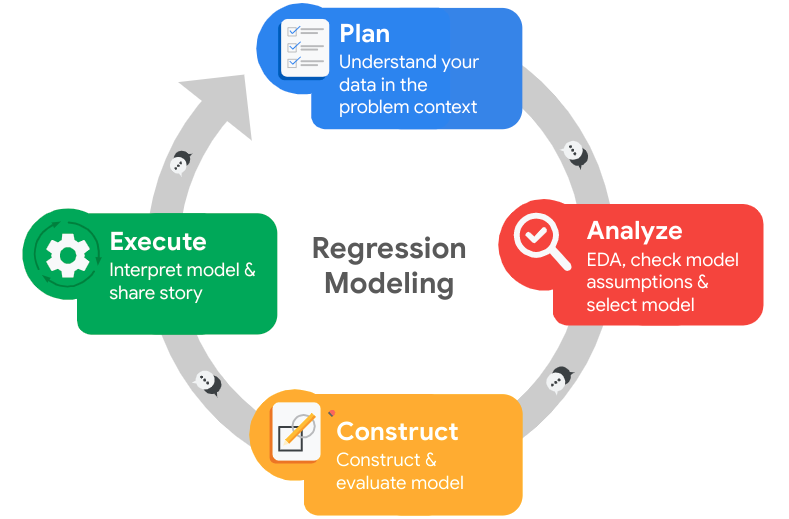

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
# Import packages
### YOUR CODE HERE ###
# For data manipulation
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("/content/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
### YOUR CODE HERE ###
df_clean = df0.copy()
df_clean.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
### YOUR CODE HERE ###
df_clean = df_clean.rename(columns = {"Work_accident": "work_accident",
                                      "average_montly_hours":"average_monthly_hours",
                                      "time_spend_company": "tenure",
                                      "Department":"department"})

# Display all column names after the update
### YOUR CODE HERE ###
df_clean.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
### YOUR CODE HERE ###
df_clean.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_monthly_hours,0
tenure,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
### YOUR CODE HERE ###
df_clean.duplicated().sum()

3008

In [ ]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df_clean[df_clean.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df_cleaned = df_clean.drop_duplicates(keep='first')
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

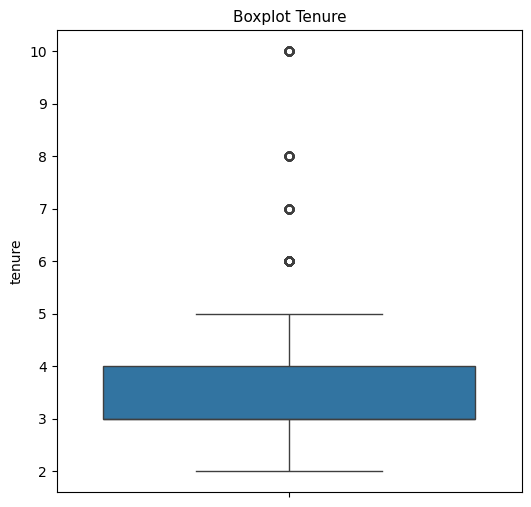

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize = (6,6) )
plt.title('Boxplot Tenure',fontsize = 11)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
sns.boxplot(data = df_cleaned["tenure"])
plt.show()

In [ ]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

#find the 25° percentile
percentile_25 = df_cleaned["tenure"].quantile(0.25)

#find the 75° percentile
percentile_75 = df_cleaned["tenure"].quantile(0.75)

#find interquarile range
iqr = percentile_75 - percentile_25

#find upper and lower limits
upper_limit = percentile_75 + (1.5*iqr)
lower_limit = percentile_25 - (1.5*iqr)

#slice the outliers
outliers = df_cleaned[(df_cleaned["tenure"] > upper_limit) | (df_cleaned["tenure"] < lower_limit)]

#show them
print('Lower limit: ',lower_limit)
print('Upper limit: ',upper_limit)
print('NUmber of outliers ',len(outliers))

Lower limit:  1.5
Upper limit:  5.5
NUmber of outliers  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

#people who left
mask_left = df_cleaned["left"] == 1
left=df_cleaned[mask_left]

#people who stayed
mask_stay = df_cleaned["left"] == 0
stay = df_cleaned[mask_stay]


# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###

#calculate total of column
total = len(left) + len(stay)

#find the percentage left
prc_left = round((len(left)/total)*100,2)

#find the percentage stay
prc_stay = round((len(stay)/total)*100,2)

#show them
print("Total: ", total)
print("people left: ",len(left))
print("people stay: ",len(stay))
print("percentage left: ",prc_left)
print("percentage stay: ",prc_stay)

Total:  11991
people left:  1991
people stay:  10000
percentage left:  16.6
percentage stay:  83.4


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

<ipython-input-20-00524506f90c>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Left' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_fig1.loc[df_fig1["left"] == 1, "left"] = 'Left'


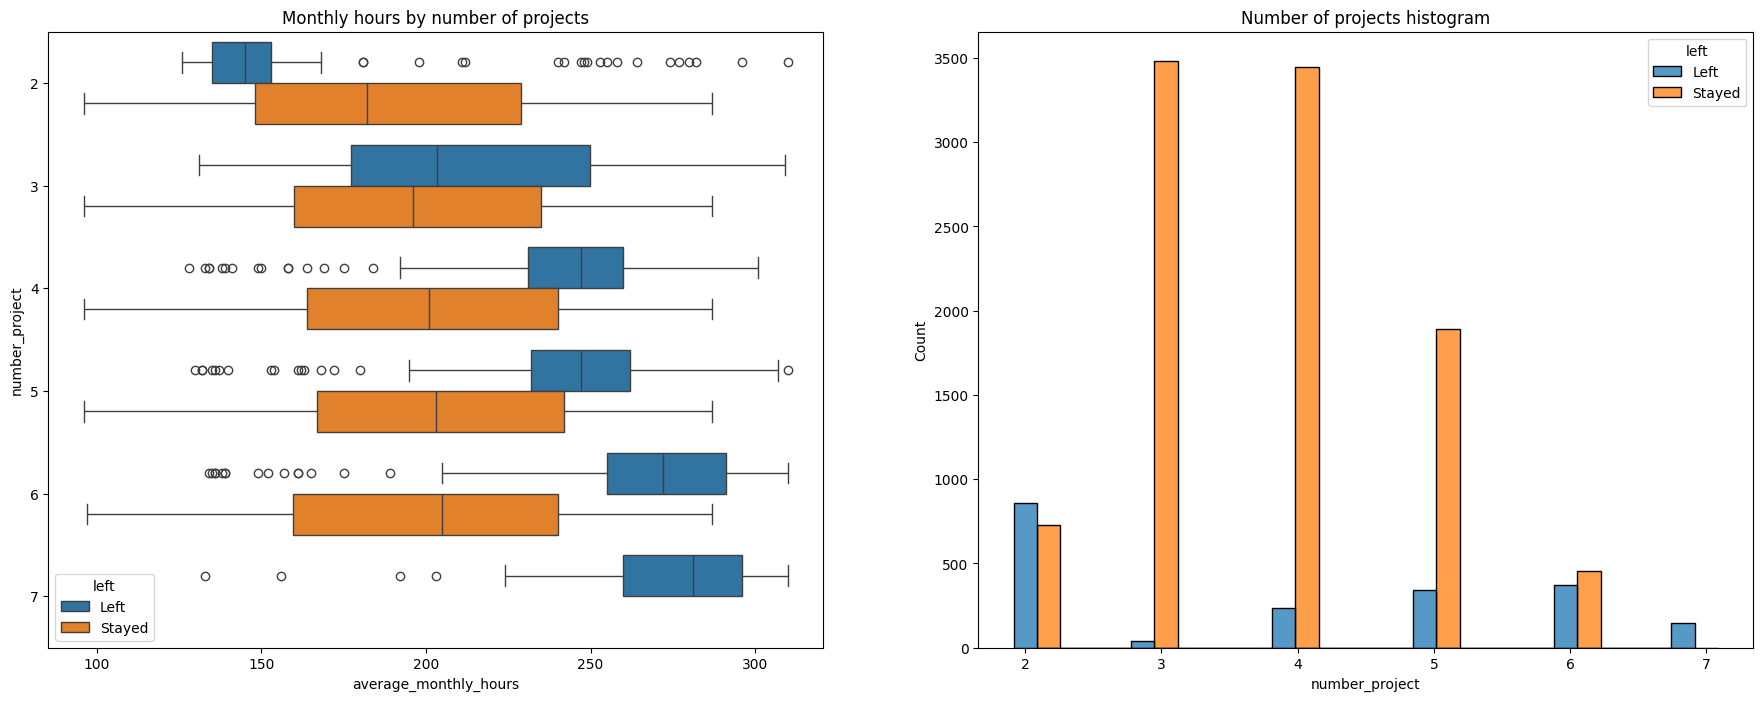

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
df_fig1 = df_cleaned.copy()
#clean the left columns 1 = left 0 = stayed
df_fig1.loc[df_fig1["left"] == 1, "left"] = 'Left'
df_fig1.loc[df_fig1["left"] == 0, "left"] = 'Stayed'

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data = df_fig1, x = 'average_monthly_hours', y ='number_project', hue = 'left', orient="h", ax = ax[0] )
ax[0].set_title('Monthly hours by number of projects', fontsize='12')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data = df_fig1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='12')

#Diplay all
plt.show()

It seems people who work on many projects/many hours left more easily.
Also all the people that had 7 projects to follow they quit.
The company has a problem with the workload, there are many people who work more thank a normal schedule
Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month

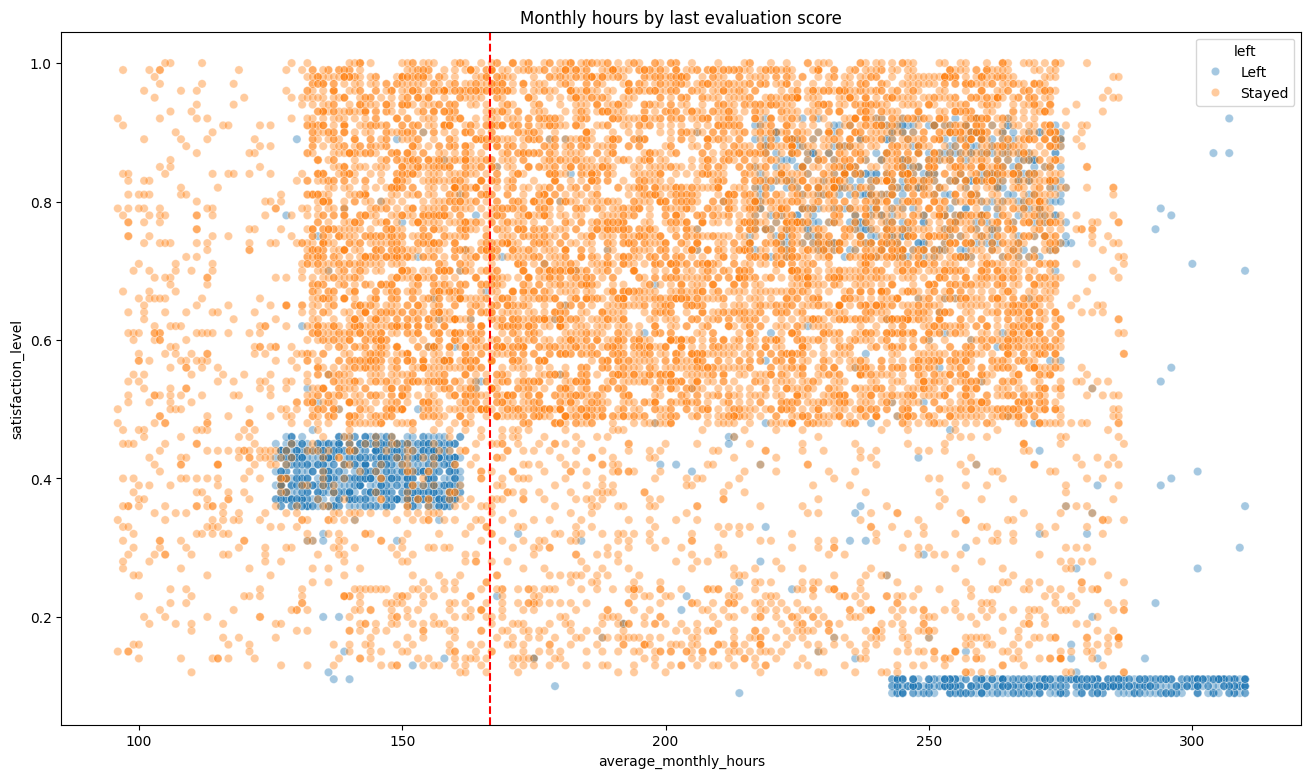

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data = df_fig1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha=0.4)
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', ls='--')

plt.title('Monthly hours by last evaluation score', fontsize='12');

plt.show()

There was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.


Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.

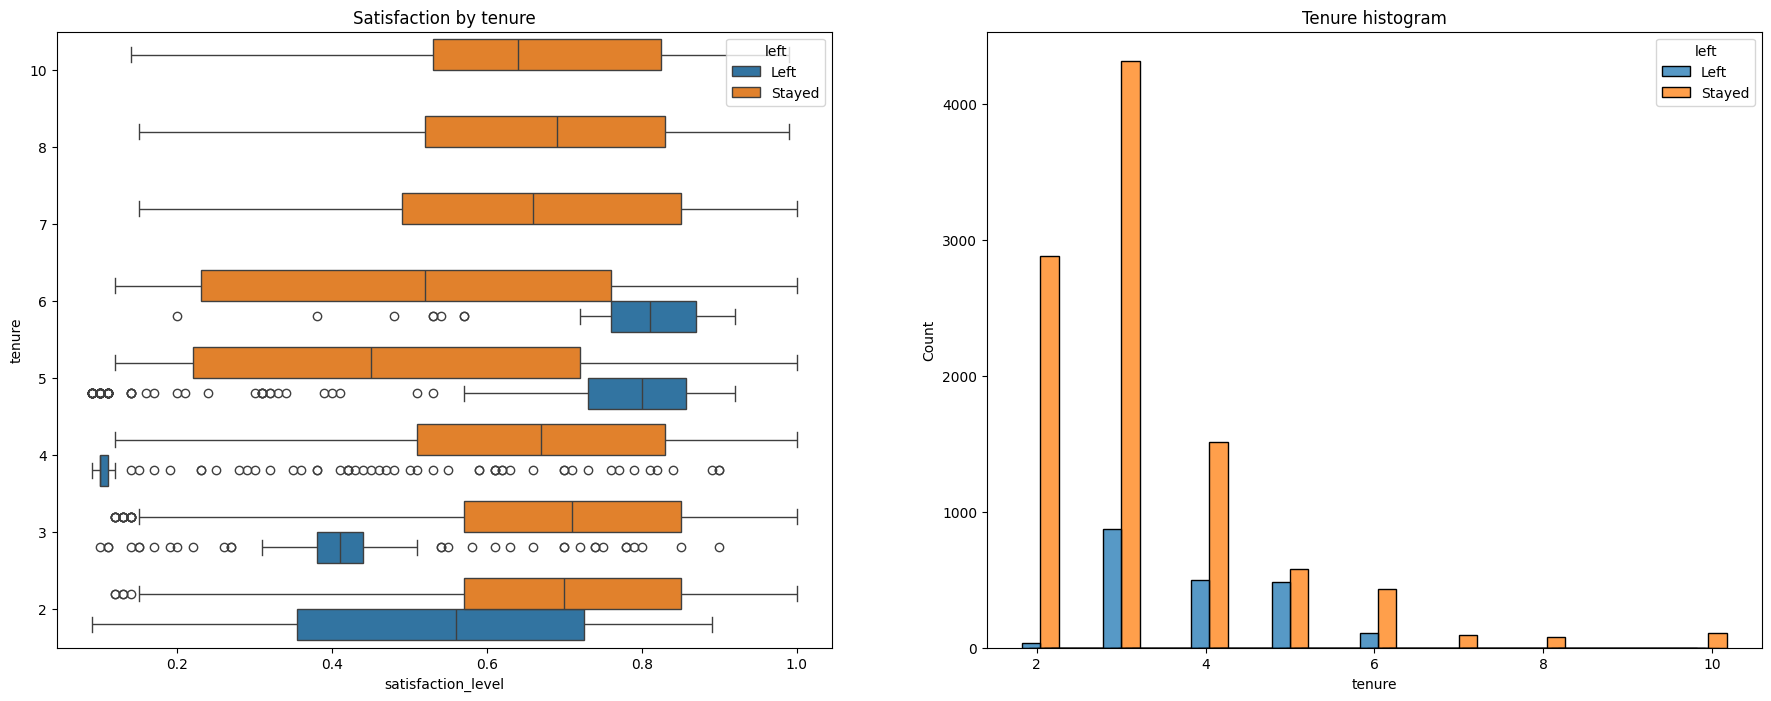

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

#Visualize satisfaction levels by tenure

#Set figure axes
fig, ax = plt.subplots(1,2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data = df_fig1, x ="satisfaction_level", y = "tenure", hue = "left", orient = "h", ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='12')


# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
sns.histplot(data=df_fig1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='12')

plt.show();

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [ ]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
result = df_fig1.groupby(['left'])['satisfaction_level'].agg(mean='mean', median='median')
result

,mean,median
left,,
Left,0.440271,0.41
Stayed,0.667365,0.69


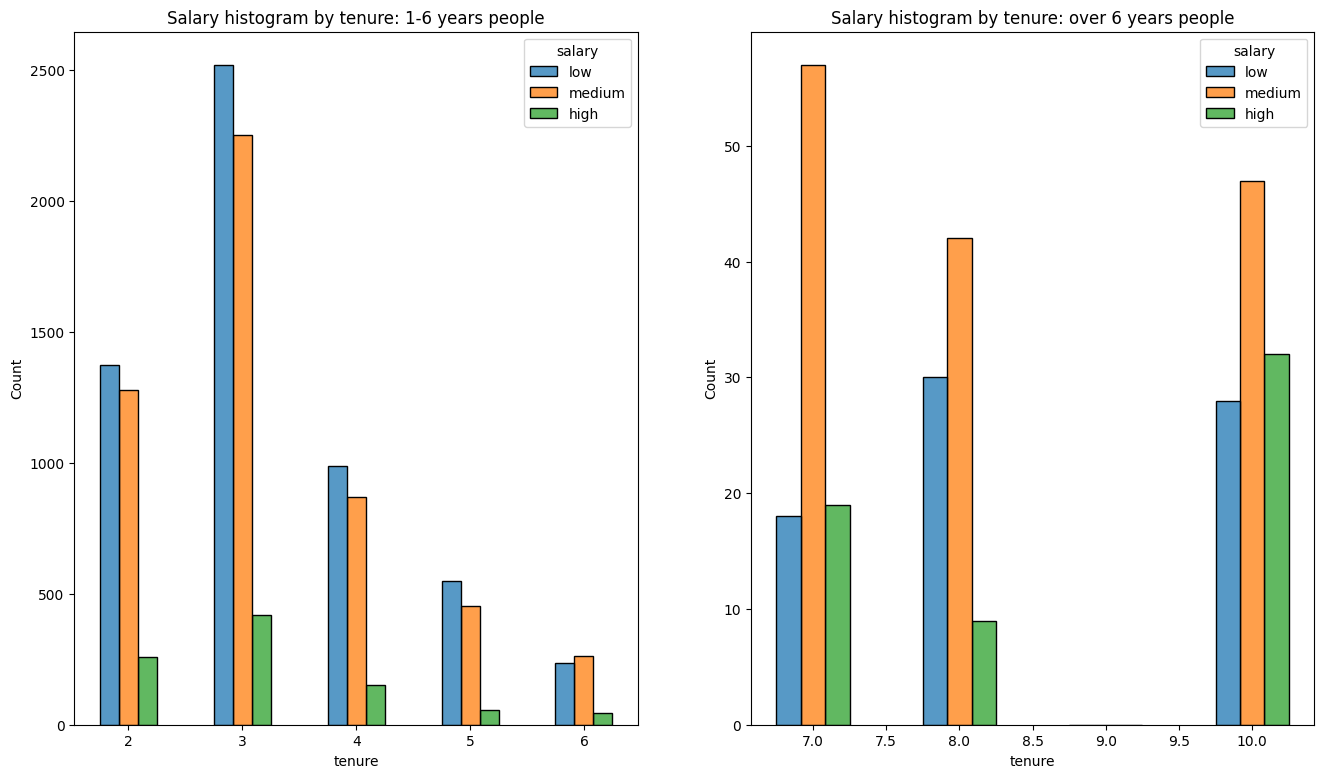

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

#split the view in 2 subplot
fig, ax = plt.subplots(1,2, figsize=(16, 9))

#split data in by tenure under and over 6
df_tenure_under_6 = df_fig1[df_fig1["tenure"] <=6 ]
df_tenure_over_6 = df_fig1[df_fig1["tenure"] >6 ]

# Plot tenure 1-6 years histogram
sns.histplot(data=df_tenure_under_6, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'],multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: 1-6 years people', fontsize='12')

# Plot tenure over 6 years histogram
sns.histplot(data=df_tenure_over_6, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'],multiple='dodge', shrink=.5, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: over 6 years people', fontsize='12')


plt.show()

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of average_monthly_hours versus last_evaluation.

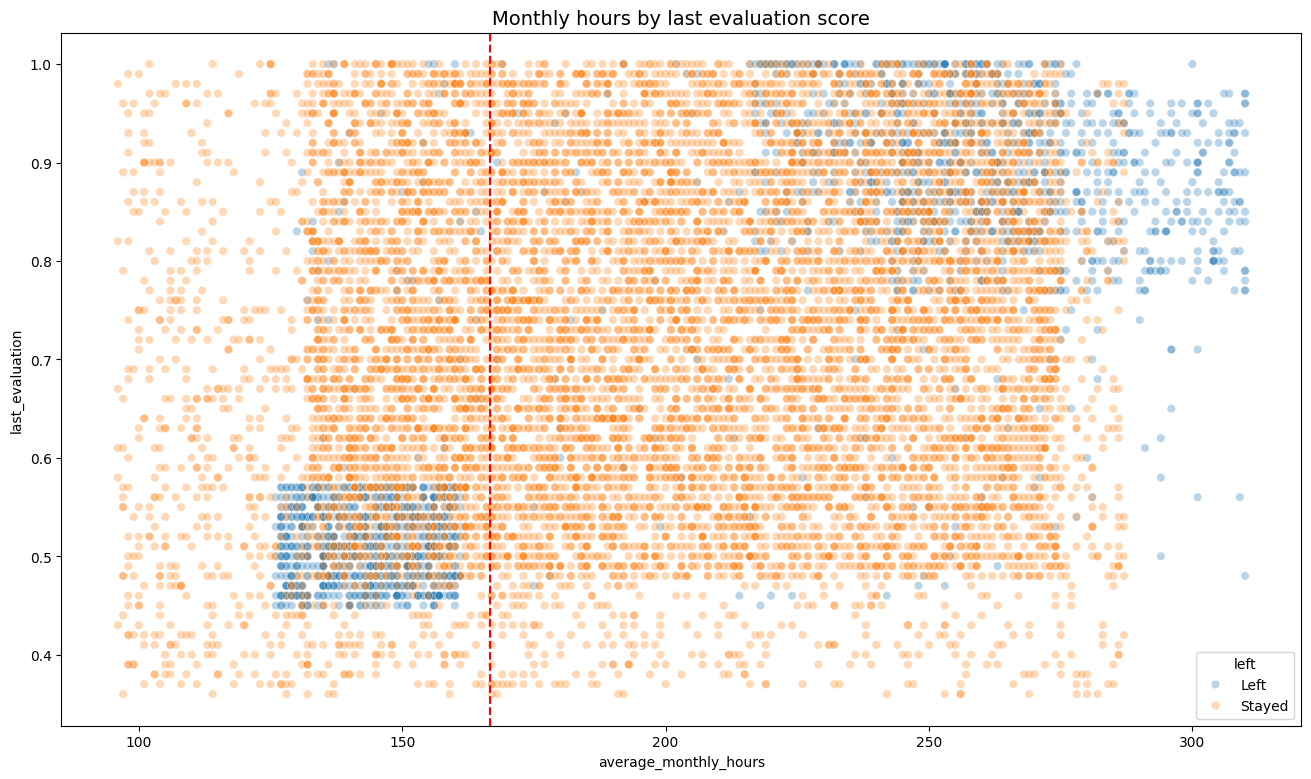

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16,9))
sns.scatterplot(data = df_fig1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.3)
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', ls='--')

plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:

The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
There seems to be a correlation between hours worked and evaluation score.
There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
Most of the employees in this company work well over 167 hours per month.

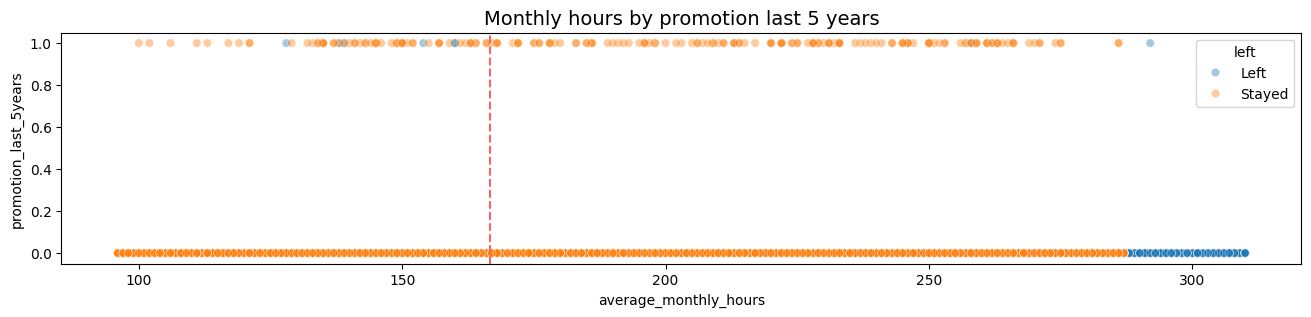

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16,3))
sns.scatterplot(data =df_fig1, x = 'average_monthly_hours', y ='promotion_last_5years', hue = 'left', alpha = 0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows how people have been promoted did not left company, otherwise people that worked most hours without being promoted left the company

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 45

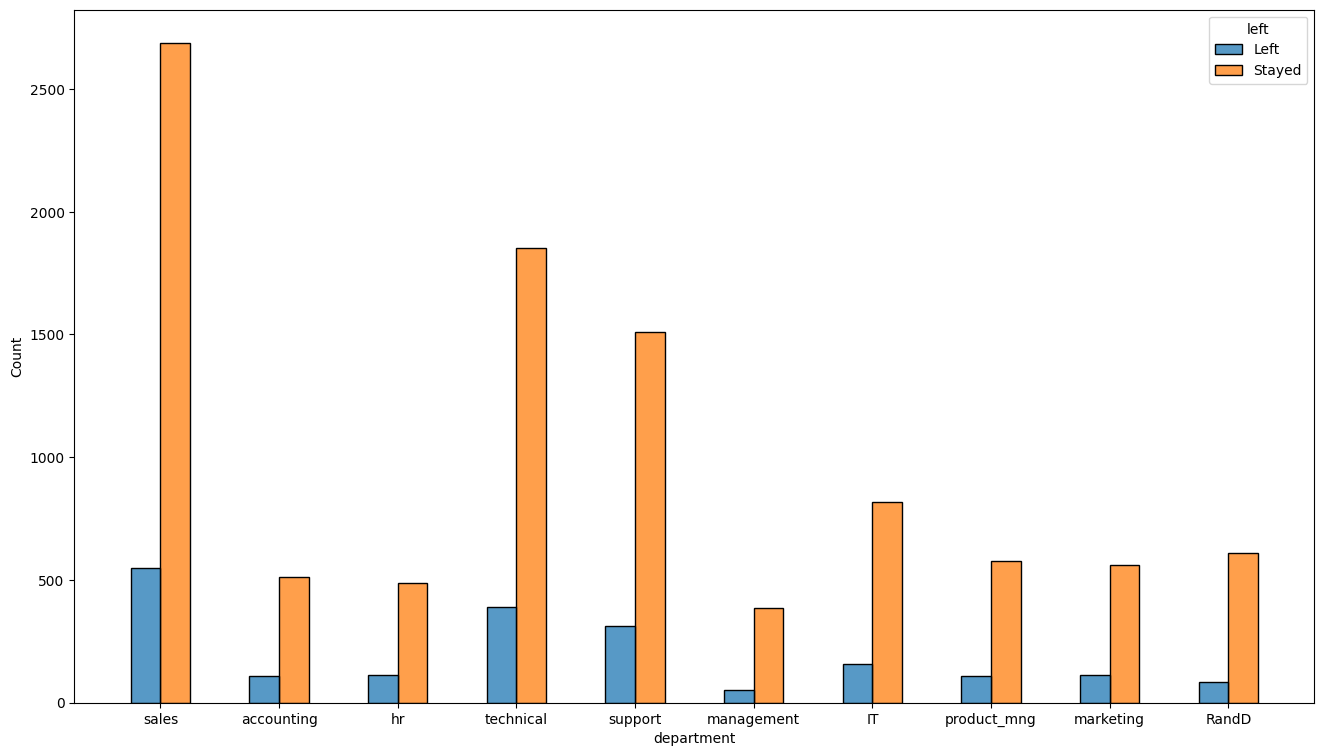

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(16,9))
sns.histplot(data = df_fig1, x='department', hue = 'left',multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of stayed/left by department', fontsize=12);

There is not a specific department where people left company

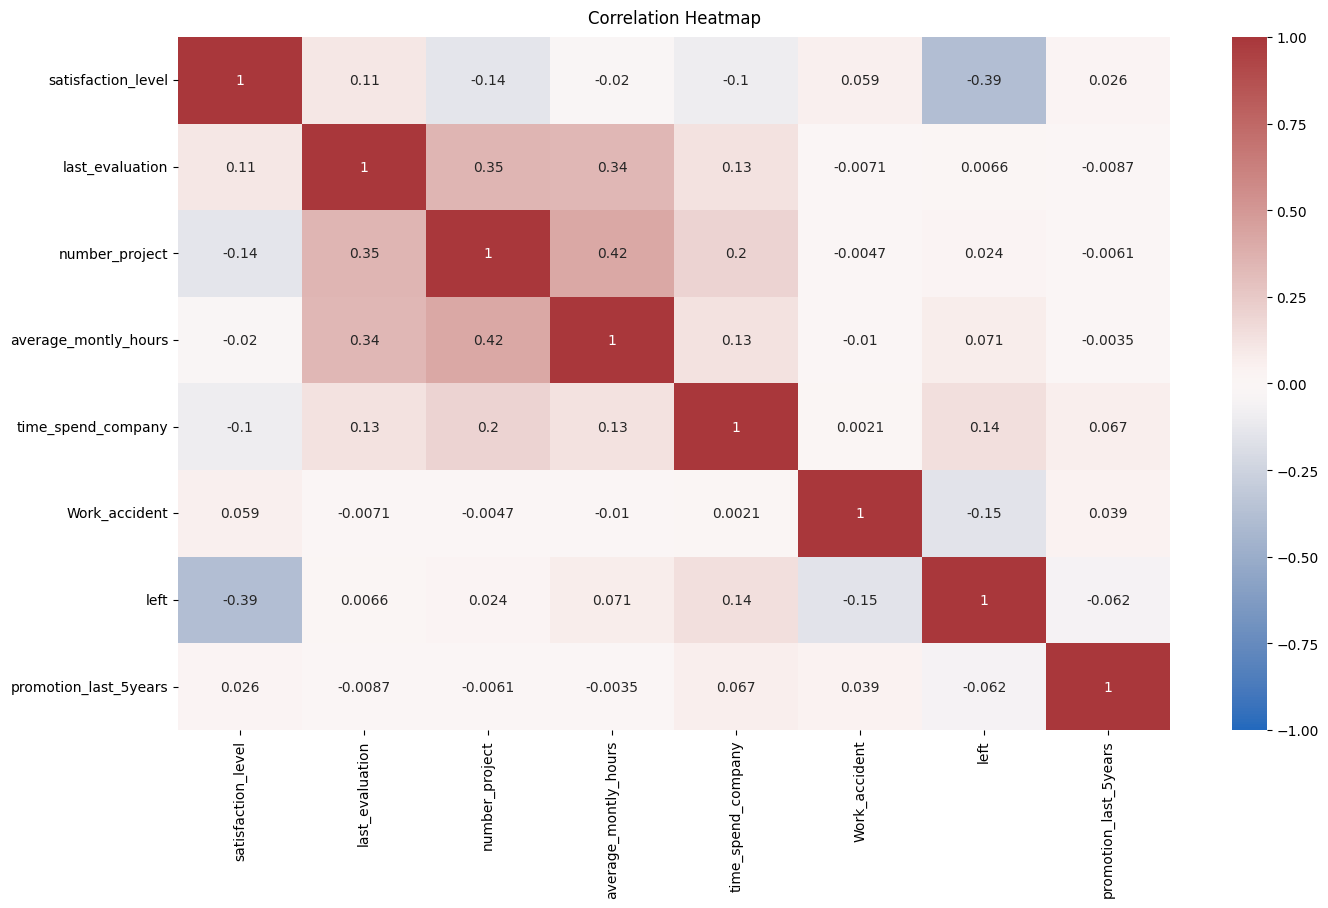

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Convert in valid number data
numerical_df = df0.select_dtypes(include=['number'])

# Plot a correlation heatmap
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(data = numerical_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10);


### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal it's to predict when an employee want to leave the company.
It means classification it's a good choose, variabile left it's a binary classification

### Identify the types of models most appropriate for this task.

Logistic regression model wuold fit the goal

### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
### YOUR CODE HERE ###
df_enc = df_clean.copy()

#encode salary column
df_enc["salary"] = (
                    df_enc["salary"].astype('category').cat.set_categories(['low','medium','high']).cat.codes
                   )
#encode department column
df_enc = pd.get_dummies(df_enc, drop_first = True)

df_enc

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,False,False,False,False,False,False,False,True,False
14995,0.37,0.48,2,160,3,0,1,0,0,False,False,False,False,False,False,False,True,False
14996,0.37,0.53,2,143,3,0,1,0,0,False,False,False,False,False,False,False,True,False
14997,0.11,0.96,6,280,4,0,1,0,0,False,False,False,False,False,False,False,True,False


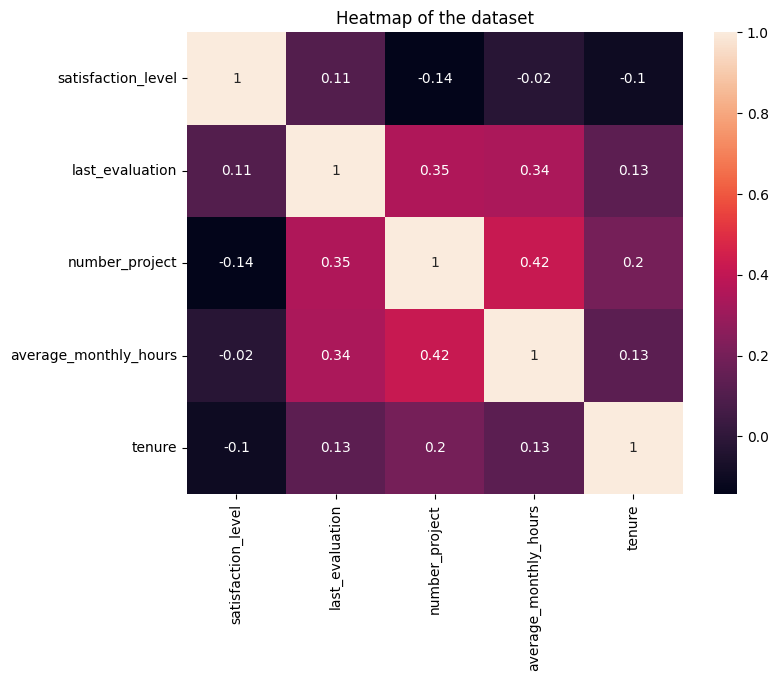

In [ ]:
#Create a heatmap to visualize how correlated variables are.
#Consider which variables you're interested in examining correlations between.

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True)
plt.title('Heatmap of the dataset')
plt.show()

In [ ]:
#logistic regression is quite sensitive to outliers, so in this stage remove the outliers in the tenure column that were identified earlier.

# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [ ]:
#find y
y = df_logreg["left"]

#find x
X = df_logreg.drop("left", axis = 1)

In [ ]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#construct logist regression model and fit it to training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train,y_train)

#get predictions from logistic regression model
y_pred = log_clf.predict(X_test)


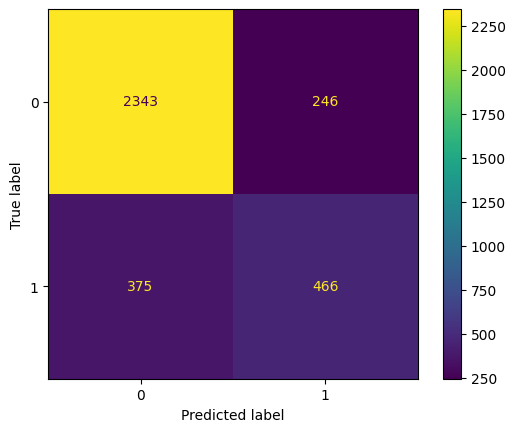

In [ ]:
#Create a confusion matrix to visualize the results of the logistic regression model.

#compute confusion matrix
log_cm = confusion_matrix(y_test,y_pred, labels=log_clf.classes_)

#create a display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [ ]:
#check the value counts in the left column, the class balance informs the way you interpret accuracy metrics
df_logreg['left'].value_counts(normalize=True)

,proportion
left,
0,0.754903
1,0.245097


In [ ]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.90      0.88      2589
    Predicted would leave       0.65      0.55      0.60       841

                 accuracy                           0.82      3430
                macro avg       0.76      0.73      0.74      3430
             weighted avg       0.81      0.82      0.81      3430



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Logistic regression model has precision of 81%, recall of 82%, f1-score of 81% (all weighted averages), and accuracy of 82%, on the test set.

### Conclusion, Recommendations, Next Steps

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.